In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Python Data analysis machine learning sample file 1.xlsx'
df = pd.read_excel(file_path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Date    Name  Age  Experience  Knowledge  Punctuality  Communication  \
0 2024-01-01   Ashok   21           1          4            9              8   
1 2024-01-01     Ram   46          20          7            9              8   
2 2024-01-01  Joseph   25           4          3            9              8   
3 2024-01-01  Ganesh   26           5          3            9              8   
4 2024-01-01    Kavi   30           8          9            9              8   

   Sales  
0      3  
1      9  
2      5  
3      5  
4     10  


In [13]:
X = df[['Age', 'Experience', 'Knowledge', 'Punctuality', 'Communication']]
y = df['Sales']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
coefficients = model.coef_
intercept = model.intercept_

In [15]:
print("\nCoefficients:")
for col, coef in zip(X.columns, coefficients):
    print(f"{col}: {coef}")
print(f"Intercept: {intercept}")


Coefficients:
Age: 0.3828178392051838
Experience: -0.4243886127655836
Knowledge: 0.268370921337825
Punctuality: 4.062390435912006
Communication: 0.024567473686303902
Intercept: -37.91312895673533


In [16]:
predictions = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


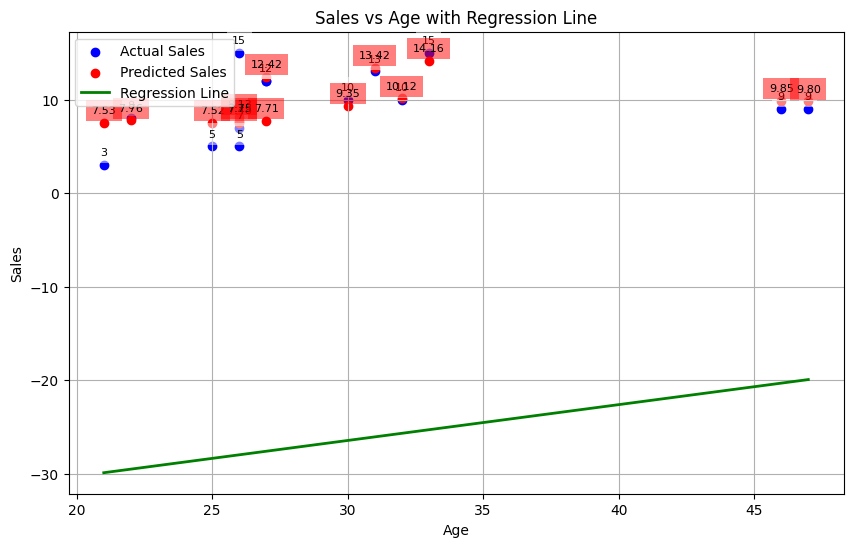

In [17]:
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
predicted_sales_line = model.predict(np.column_stack([age_range, np.zeros_like(age_range), np.zeros_like(age_range), np.zeros_like(age_range), np.zeros_like(age_range)]))
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], y, color='blue', label='Actual Sales')
plt.scatter(df['Age'], predictions, color='red', label='Predicted Sales')
plt.plot(age_range, predicted_sales_line, color='green', label='Regression Line', linewidth=2)
for i in range(len(df)):
    plt.text(df['Age'].iloc[i], y.iloc[i] + 1,  # Offset for actual sales
             str(y.iloc[i]),
             fontsize=8,
             ha='center',
             color='black',
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

for i in range(len(df)):
    plt.text(df['Age'].iloc[i], predictions[i] + 1,  # Offset for predicted sales
             f"{predictions[i]:.2f}",  # Format to 2 decimal places
             fontsize=8,
             ha='center',
             color='black',
             bbox=dict(facecolor='red', alpha=0.5, edgecolor='none'))  # Background for better visibility
plt.xlabel('Age')
plt.ylabel('Sales')
plt.title('Sales vs Age with Regression Line')
plt.legend()
plt.grid()
plt.show()
